# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매개수(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 입니다.
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 **팀 과제**를 위해 필요합니다.

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [4]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [5]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [6]:
x.isna().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

* KNN Inputer로 채울 수 있음
    * KNN Inputer는 가변수화가 된 상태에서 사용 가능

In [7]:
x['CompPrice'].fillna(0, inplace = True)

1. CompPrice에 대한 결측치가 존재한다.
- 경쟁사 제품에 가격이 존재하지 않다는 건, 해당 지역은 경쟁사가 제품을 판매하지 않는다 라는 의미로 판단할 수 있다. -> 결측치(경쟁사 매출)를 0으로 처리 


In [8]:
# plt.boxplot(x['Income'])

In [9]:
x['Income'].fillna(data['Income'].mean(), inplace = True)

2. Income에 대한 결측치가 존재한다.
- 해당 지역 시민들에 대한 평균 월 수입 데이터가 존재하지 않는다.
  
  -> 해당 데이터에 이상치가 존재하지 않으니, 해당 변수의 평균 값을 채운다.

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [10]:
# 1. 가변수화 첫 번째 방법
# x = pd.get_dummies(x, drop_first=True)

In [11]:
# 2. 가변수화 두 번째 방법
dum_cols = ['ShelveLoc', 'US', 'Urban', 'Education']

x = pd.get_dummies(x, columns=dum_cols, drop_first=True)

In [12]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,139.0,111.000000,5,310,132,62,0,0,1,1,0,0,1,0,0,0,0,0
1,143.0,21.000000,5,81,160,67,0,1,1,0,0,1,0,0,0,0,0,0
2,114.0,68.673611,0,97,125,29,0,1,0,1,0,1,0,0,0,0,0,0
3,119.0,88.000000,10,170,101,61,0,1,1,1,0,0,1,0,0,0,0,0
4,136.0,81.000000,15,425,120,67,1,0,1,1,0,0,0,0,0,0,0,0


 * KNN Inputer 수행

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(x)
# 데이터프레임으로 다시 만듭니다
x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
ShelveLoc_Good      0
ShelveLoc_Medium    0
US_Yes              0
Urban_Yes           0
Education_11        0
Education_12        0
Education_13        0
Education_14        0
Education_15        0
Education_16        0
Education_17        0
Education_18        0
dtype: int64

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.

In [14]:
# 경쟁사 제품 가격과 자사 제품 가격의 차이
x['PriceGap'] = abs(x['CompPrice'] - x['Price'])

### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [15]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

In [16]:
x_train.shape, x_val.shape

((240, 19), (60, 19))

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [17]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
# 스케일링 적용 한 변수 생성
x_train_scale = scaler.fit_transform(x_train)
x_val_scale = scaler.transform(x_val)

# 데이터프레임으로 다시 만듭니다
# x_train_scale = pd.DataFrame(x_train_scale, columns=col_x)
# x_train_scale.head()

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Lasso

result={}

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Linear Regression 모델링

In [19]:
# 모델 선언하기
lr_model = LinearRegression()

In [20]:
# 학습하기
lr_model.fit(x_train, y_train)

LinearRegression()

In [21]:
# # 성능검증
print(list(x_train))
print(lr_model.coef_)
print(lr_model.intercept_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'US_Yes', 'Urban_Yes', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'PriceGap']
[ 3.98604301e-02  1.23334383e-02  1.16009897e-01  4.06817371e-04
 -7.35259882e-02 -4.98376413e-02  4.93089932e+00  2.02951766e+00
 -1.63435563e-02  2.33576421e-01 -8.43531999e-01 -4.17099447e-01
 -4.81790006e-01 -6.73543636e-01 -5.12793042e-01 -4.12714987e-01
 -4.66157224e-01 -1.03729964e+00  4.62945896e-02]
9.438777475878656


In [22]:
# 예측하기
val_pred_lr = lr_model.predict(x_val)
print(mean_absolute_error(y_val, val_pred_lr))
result['LR'] = mean_absolute_error(y_val, val_pred_lr)

1.1538557627482824


#### (2) Decision Tree 모델링

In [23]:
# # GridSearchCV의 param_grid 설정
# params = {
#     'max_depth' : range(1, 51)
# }

# dtr_model = DecisionTreeRegressor()

# grid_tree = GridSearchCV(dtr_model, params, cv=5, scoring='r2')
# grid_tree.fit(x_train, y_train)

# print('best parameters : ', grid_tree.best_params_)
# print('best score : ', grid_tree.best_score_)
# em = grid_tree.best_estimator_
# pred = em.predict(x_val)
# r2_score(y_val, pred)

In [24]:
# # 최적파라미터, 성능 확인
# print('최적파라미터:', grid_tree.best_params_)
# print('성능:', grid_tree.best_score_)

In [25]:
# # 학습하기
# dtr_model.fit(x_train, y_train)

In [26]:
# # 예측하기
# y_pred = dtr_model.predict(x_val)
# y_pred[:2]

In [27]:
# y_val[:2]

In [28]:
# # 평가하기
# mae = mean_absolute_error(y_val, y_pred)
# r2_points = r2_score(y_val, y_pred)
# print("MAE:", mae)
# print("R^2:", r2_points)
# result['Decision Tree'] = mean_absolute_error(y_val, y_pred)

In [29]:
dst_model = DecisionTreeRegressor(max_depth=3)
dst_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [30]:
# !pip install Ipython

In [31]:
# !pip install ipython

In [32]:
# # 시각화
# from sklearn.tree import export_graphviz # 디시젼 트리 시각화 라이브러리 선언

# export_graphviz(dst_model #<--여기에 모델이름 넣기
#                , out_file = 'DecisionTree.dot'
#                , feature_names = x_train.columns  # feature 이름
#                , rounded = True, precision=3, filled=True)
# !dot -Tpng DecisionTree.dot -o DecisionTree.png -Gdpi=300

# # 이미지 파일 로딩하기
# from Ipython.display import Image
# Image(filename='DecisionTree.png', width=800) # 사이즈 조정

# # 7일전의 이용량과 2일전의 이용량 변수가 자주 사용되었음을 확인 가능

In [33]:
train_mae, val_mae = [],[]

depth=list(range(1,20))
for d in depth:
    dst_model = DecisionTreeRegressor(max_depth=d)
    dst_model.fit(x_train, y_train)
    train_pred_dst = dst_model.predict(x_train)
    val_pred_dst = dst_model.predict(x_val)
    train_mae.append(mean_absolute_error(y_train, train_pred_dst))
    val_mae.append(mean_absolute_error(y_val, val_pred_dst))
    print(d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


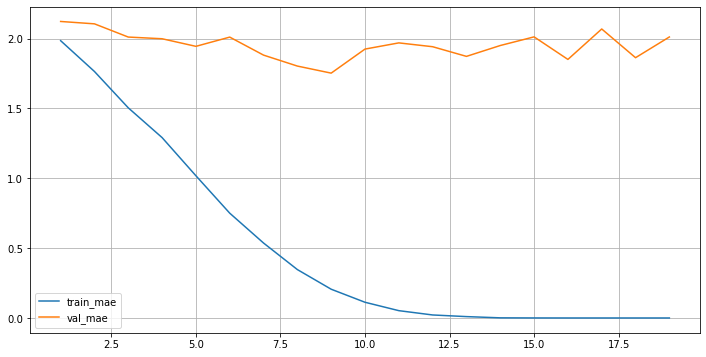

In [34]:
plt.figure(figsize=(12,6))
plt.plot(depth, train_mae, label='train_mae')
plt.plot(depth, val_mae, label='val_mae')
plt.legend()
plt.grid()
plt.show()

'''8정도가 적당함을 확인 가능''' 

In [35]:
dst_model=DecisionTreeRegressor(max_depth=8)
dst_model.fit(x_train, y_train)
val_pred_dst=dst_model.predict(x_val)
print(mean_absolute_error(y_val, val_pred_dst))
result['DST'] = mean_absolute_error(y_val, val_pred_dst)

1.923139417989418


'''MAE의 의미: 평균 오차'''

<BarContainer object of 19 artists>

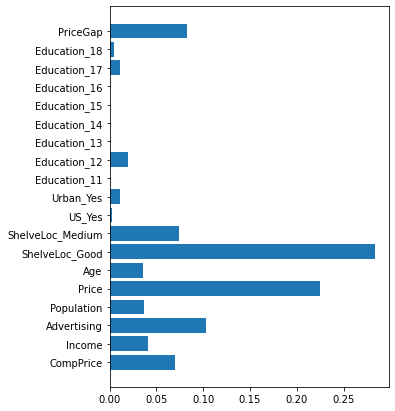

In [36]:
# 변수 중요도 시각화
plt.figure(figsize=(5,7))
plt.barh(y=list(x), width = dst_model.feature_importances_) # y 값은 변수

[분석 방법]
- 그리드서치 CV를 활용해 최적의 파라미터 탐색 및 적용

[분석 결과]
- mse : 6.29, r2score : 0.227으로써 썩 좋지 않는 모델 성능을 보였다.
- 해당 모델을 바탕으로 데이터의 변수 중요도를 확인하니, 자사 제품의 가격과 진열 상태에 따라서 매출이 달라지는 걸 확인 할 수 있다.
- 해당 변수를 바탕으로 매출량을 증대 시켜야 한다.

#### (3) KNN 모델링

In [37]:
rand_param = {
    'n_neighbors': range(2, 20),         # 랜덤으로 값을 딕셔너리로 저장
#     'metric': ['euclidean', 'manhattan'] # 이클리디안, 맨하탄 거리를 사용한다.
}
knn_model = KNeighborsRegressor()    
knn_model_grid = GridSearchCV(knn_model, rand_param, scoring='neg_mean_absolute_error')

'''그리드 서치나 랜덤서치는 기본적인 스코어가 높은게 좋은데 오차는 낮은게 좋으므로 neg_(마이너스)를 붙여서높은게 좋은걸로 바꿔줌 '''

In [38]:
knn_model_grid.fit(x_train_scale, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 20)},
             scoring='neg_mean_absolute_error')

In [39]:
# 최적파라미터, 성능 확인
print('최적파라미터:', knn_model_grid.best_params_)
print('성능:', knn_model_grid.best_score_)

최적파라미터: {'n_neighbors': 9}
성능: -1.904328703703704


In [40]:
# 학습하기
knn_model = KNeighborsRegressor(n_neighbors=41, metric='manhattan')
knn_model.fit(x_train_scale, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=41)

In [41]:
# 예측하기
val_pred_knn = knn_model_grid.predict(x_val_scale)

In [42]:
# 평가하기
print('MAE : ', mean_absolute_error(y_val, val_pred_knn))
result['KNN'] = mean_absolute_error(y_val, val_pred_knn)

MAE :  2.0468148148148146


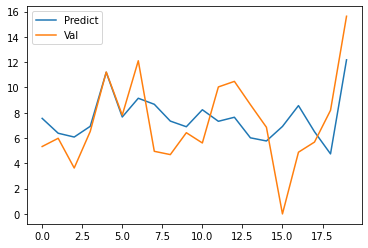

In [43]:
plt.plot(val_pred_knn[:20], label = 'Predict')
plt.plot(np.array(y_val)[:20], label = 'Val')
plt.legend()

[분석 방법] 
- 그리드서치 CV를 활용해 최적의 파라미터 탐색 및 적용
- n_neighborrs : 9 

[분석 결과]
- mae : 2.04으로 썩 좋지 않는 모델 성능을 보였다.
- 위 그래프를 보는 것처럼 해당 모델은 좋지 않다.


#### (4) SVM 모델링

In [44]:
svm_model = SVR()

params = {'C':[0.05, 0.1, 0.2, 1.5, 10],
          'gamma':[0.1,1,5,10]}

svm_model_grid = GridSearchCV(svm_model, param_grid=params, cv=5, scoring='neg_mean_absolute_error')

In [45]:
svm_model_grid.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.05, 0.1, 0.2, 1.5, 10],
                         'gamma': [0.1, 1, 5, 10]},
             scoring='neg_mean_absolute_error')

In [46]:
# 최적파라미터, 성능 확인
print('최적파라미터:', svm_model_grid.best_params_)
print('성능:', svm_model_grid.best_score_)

최적파라미터: {'C': 10, 'gamma': 0.1}
성능: -1.1337263240020978


In [47]:
# 예측하기
val_pred_svm = svm_model_grid.predict(x_val_scale)

In [48]:
# 평가하기
print('MAE : ', mean_absolute_error(y_val, val_pred_svm))
result['SVM'] = mean_absolute_error(y_val, val_pred_svm)

MAE :  1.2073859720281113


#### (5) Random Forest 모델링

In [49]:
# 모델 선언하기
rf_model = RandomForestRegressor()

In [50]:
# 학습 하기
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
# 예측 하기
val_pred_rf = rf_model.predict(x_val)

In [52]:
# 평가하기
print('MAE : ', mean_absolute_error(y_val, val_pred_rf))
result['XGB'] = mean_absolute_error(y_val, val_pred_rf)

MAE :  1.449385


#### (6) XGB 모델링

In [53]:
xgb_model = XGBRegressor(objective='reg:squarederror')

params = {'max_depth':range(2,6)
         ,'n_estimators':range(20,201,10)
         ,'learning_rate':[0.01,0.1,0.2,0.3]}

xgb_model_rs=RandomizedSearchCV(xgb_model, params, n_iter=20, cv=10, scoring='neg_mean_absolute_error')
xgb_model_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

In [54]:
# 최적파라미터, 성능 확인
print('최적파라미터:', xgb_model_rs.best_params_)
print('성능:', xgb_model_rs.best_score_)

최적파라미터: {'n_estimators': 80, 'max_depth': 2, 'learning_rate': 0.3}
성능: -1.2080802376667659


In [55]:
# 예측하기
val_pred_xgb = xgb_model_rs.predict(x_val)

In [56]:
# 평가하기
print('MAE : ', mean_absolute_error(y_val, val_pred_svm))
result['KNN'] = mean_absolute_error(y_val, val_pred_svm)

MAE :  1.2073859720281113


##1. 분석 방법 
- 랜덤서치 CV를 활용해 최적의 파라미터 탐색 및 적용
- max_depth : 4


##2. 분석 결과
- r2_score 0.69 이상으로 나쁘지 않은 성능을 보였다.
- 위의 시각화를 확인하면 예측값과 실제 값이 비슷한 양상을 보였다.

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [57]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

import tensorflow as tf
from tensorflow import keras

In [58]:
x_train.shape, y_train.shape

((240, 19), (240,))

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [59]:
input = x_train.shape[1]
input

19

* 모델1 

In [60]:
########
# 모델링 : Sequential API style
########

# 1번 청소 : 이미 만들어진 모델이 있다면 그 모델을 없애줘
keras.backend.clear_session()

# 2번 모델 선언
model = keras.models.Sequential()

# 3번 모델 블록 조립
model.add( keras.layers.Input(shape=(input,)) )
model.add( keras.layers.Dense(1) )

## 오리지널 Sequential API
# model.add( keras.layers.Dense(1, input_shape=(1,)) )

# 4번 컴파일 
model.compile(loss='mae', optimizer='adam')

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [61]:
es = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, patience=5, restore_best_weights=True)

hist = model.fit(x_train_scale, y_train, epochs=1000, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 1s 60ms/step - loss: 8.0450 - val_loss: 7.7724
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 8.0037 - val_loss: 7.7322
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 7.9620 - val_loss: 7.6921
Epoch 4/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.9203 - val_loss: 7.6519
Epoch 5/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.8789 - val_loss: 7.6117
Epoch 6/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.8369 - val_loss: 7.5717
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.7957 - val_loss: 7.5314
Epoch 8/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.7539 - val_loss: 7.4913
Epoch 9/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.7124 - val_loss: 7.4510
Epoch 10/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.6708 - val_loss: 7.4108
Epoch 11/

6/6 [==============================] - 0s 11ms/step - loss: 4.7819 - val_loss: 4.6219
Epoch 84/1000
6/6 [==============================] - 0s 12ms/step - loss: 4.7479 - val_loss: 4.5863
Epoch 85/1000
6/6 [==============================] - 0s 12ms/step - loss: 4.7137 - val_loss: 4.5506
Epoch 86/1000
6/6 [==============================] - 0s 11ms/step - loss: 4.6791 - val_loss: 4.5155
Epoch 87/1000
6/6 [==============================] - 0s 12ms/step - loss: 4.6457 - val_loss: 4.4808
Epoch 88/1000
6/6 [==============================] - 0s 12ms/step - loss: 4.6135 - val_loss: 4.4455
Epoch 89/1000
6/6 [==============================] - 0s 13ms/step - loss: 4.5793 - val_loss: 4.4110
Epoch 90/1000
6/6 [==============================] - 0s 11ms/step - loss: 4.5470 - val_loss: 4.3763
Epoch 91/1000
6/6 [==============================] - 0s 11ms/step - loss: 4.5151 - val_loss: 4.3414
Epoch 92/1000
6/6 [==============================] - 0s 13ms/step - loss: 4.4820 - val_loss: 4.3070
Epoch 93/1000


6/6 [==============================] - 0s 13ms/step - loss: 2.8598 - val_loss: 2.5022
Epoch 165/1000
6/6 [==============================] - 0s 13ms/step - loss: 2.8483 - val_loss: 2.4902
Epoch 166/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.8362 - val_loss: 2.4783
Epoch 167/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.8243 - val_loss: 2.4664
Epoch 168/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.8125 - val_loss: 2.4547
Epoch 169/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.8002 - val_loss: 2.4432
Epoch 170/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.7899 - val_loss: 2.4308
Epoch 171/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.7769 - val_loss: 2.4197
Epoch 172/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.7654 - val_loss: 2.4092
Epoch 173/1000
6/6 [==============================] - 0s 13ms/step - loss: 2.7546 - val_loss: 2.3986
Epoch

6/6 [==============================] - 0s 12ms/step - loss: 2.3507 - val_loss: 2.0511
Epoch 246/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.3470 - val_loss: 2.0498
Epoch 247/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.3437 - val_loss: 2.0485
Epoch 248/1000
6/6 [==============================] - 0s 14ms/step - loss: 2.3405 - val_loss: 2.0473
Epoch 249/1000
6/6 [==============================] - 0s 13ms/step - loss: 2.3373 - val_loss: 2.0462
Epoch 250/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.3346 - val_loss: 2.0450
Epoch 251/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.3315 - val_loss: 2.0440
Epoch 252/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.3291 - val_loss: 2.0431
Epoch 253/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.3260 - val_loss: 2.0424
Epoch 254/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.3232 - val_loss: 2.0417
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.1976 - val_loss: 1.9961
Epoch 327/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.1961 - val_loss: 1.9956
Epoch 328/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.1948 - val_loss: 1.9951
Epoch 329/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.1934 - val_loss: 1.9944
Epoch 330/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.1920 - val_loss: 1.9938
Epoch 331/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.1906 - val_loss: 1.9932
Epoch 332/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.1892 - val_loss: 1.9926
Epoch 333/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.1877 - val_loss: 1.9920
Epoch 334/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.1863 - val_loss: 1.9914
Epoch 335/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.1850 - val_loss: 1.9908
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.0776 - val_loss: 1.9445
Epoch 408/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.0762 - val_loss: 1.9438
Epoch 409/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.0747 - val_loss: 1.9432
Epoch 410/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.0730 - val_loss: 1.9425
Epoch 411/1000
6/6 [==============================] - 0s 13ms/step - loss: 2.0715 - val_loss: 1.9418
Epoch 412/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.0702 - val_loss: 1.9412
Epoch 413/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.0685 - val_loss: 1.9405
Epoch 414/1000
6/6 [==============================] - 0s 14ms/step - loss: 2.0671 - val_loss: 1.9399
Epoch 415/1000
6/6 [==============================] - 0s 14ms/step - loss: 2.0656 - val_loss: 1.9393
Epoch 416/1000
6/6 [==============================] - 0s 12ms/step - loss: 2.0642 - val_loss: 1.9387
Epoch

6/6 [==============================] - 0s 14ms/step - loss: 1.9753 - val_loss: 1.8945
Epoch 489/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.9744 - val_loss: 1.8939
Epoch 490/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.9732 - val_loss: 1.8934
Epoch 491/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.9720 - val_loss: 1.8930
Epoch 492/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.9710 - val_loss: 1.8926
Epoch 493/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.9700 - val_loss: 1.8924
Epoch 494/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.9688 - val_loss: 1.8918
Epoch 495/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.9677 - val_loss: 1.8914
Epoch 496/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.9665 - val_loss: 1.8910
Epoch 497/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.9655 - val_loss: 1.8904
Epoch

6/6 [==============================] - 0s 13ms/step - loss: 1.8979 - val_loss: 1.8602
Epoch 570/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8971 - val_loss: 1.8596
Epoch 571/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.8967 - val_loss: 1.8587
Epoch 572/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8955 - val_loss: 1.8582
Epoch 573/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.8947 - val_loss: 1.8577
Epoch 574/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.8939 - val_loss: 1.8574
Epoch 575/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8933 - val_loss: 1.8566
Epoch 576/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8923 - val_loss: 1.8558
Epoch 577/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.8914 - val_loss: 1.8556
Epoch 578/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.8906 - val_loss: 1.8551
Epoch

6/6 [==============================] - 0s 14ms/step - loss: 1.8298 - val_loss: 1.8163
Epoch 651/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.8290 - val_loss: 1.8154
Epoch 652/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.8279 - val_loss: 1.8149
Epoch 653/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8271 - val_loss: 1.8142
Epoch 654/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8263 - val_loss: 1.8134
Epoch 655/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8254 - val_loss: 1.8128
Epoch 656/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8246 - val_loss: 1.8121
Epoch 657/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.8238 - val_loss: 1.8119
Epoch 658/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.8228 - val_loss: 1.8112
Epoch 659/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.8220 - val_loss: 1.8105
Epoch

6/6 [==============================] - 0s 12ms/step - loss: 1.7612 - val_loss: 1.7723
Epoch 732/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.7605 - val_loss: 1.7716
Epoch 733/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.7596 - val_loss: 1.7711
Epoch 734/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.7591 - val_loss: 1.7707
Epoch 735/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.7581 - val_loss: 1.7702
Epoch 736/1000
6/6 [==============================] - 0s 15ms/step - loss: 1.7574 - val_loss: 1.7696
Epoch 737/1000
6/6 [==============================] - 0s 15ms/step - loss: 1.7567 - val_loss: 1.7692
Epoch 738/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.7558 - val_loss: 1.7686
Epoch 739/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.7550 - val_loss: 1.7682
Epoch 740/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.7542 - val_loss: 1.7676
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 1.6982 - val_loss: 1.7355
Epoch 813/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6974 - val_loss: 1.7351
Epoch 814/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6966 - val_loss: 1.7348
Epoch 815/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6958 - val_loss: 1.7344
Epoch 816/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.6952 - val_loss: 1.7341
Epoch 817/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.6943 - val_loss: 1.7335
Epoch 818/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6935 - val_loss: 1.7331
Epoch 819/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6928 - val_loss: 1.7328
Epoch 820/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.6920 - val_loss: 1.7325
Epoch 821/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6912 - val_loss: 1.7320
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 1.6342 - val_loss: 1.7047
Epoch 894/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.6334 - val_loss: 1.7045
Epoch 895/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6326 - val_loss: 1.7042
Epoch 896/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.6318 - val_loss: 1.7038
Epoch 897/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6311 - val_loss: 1.7036
Epoch 898/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.6302 - val_loss: 1.7031
Epoch 899/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.6294 - val_loss: 1.7026
Epoch 900/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.6287 - val_loss: 1.7023
Epoch 901/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.6280 - val_loss: 1.7021
Epoch 902/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.6270 - val_loss: 1.7017
Epoch

6/6 [==============================] - 0s 12ms/step - loss: 1.5732 - val_loss: 1.6741
Epoch 975/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.5725 - val_loss: 1.6741
Epoch 976/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.5717 - val_loss: 1.6739
Epoch 977/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.5709 - val_loss: 1.6735
Epoch 978/1000
6/6 [==============================] - 0s 11ms/step - loss: 1.5701 - val_loss: 1.6732
Epoch 979/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.5695 - val_loss: 1.6730
Epoch 980/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.5687 - val_loss: 1.6728
Epoch 981/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.5681 - val_loss: 1.6726
Epoch 982/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.5673 - val_loss: 1.6722
Epoch 983/1000
6/6 [==============================] - 0s 12ms/step - loss: 1.5665 - val_loss: 1.6716
Epoch

In [62]:
model.evaluate(x_val_scale, y_val, verbose = 1)

2/2 [==============================] - 0s 4ms/step - loss: 1.9221


1.9220759868621826

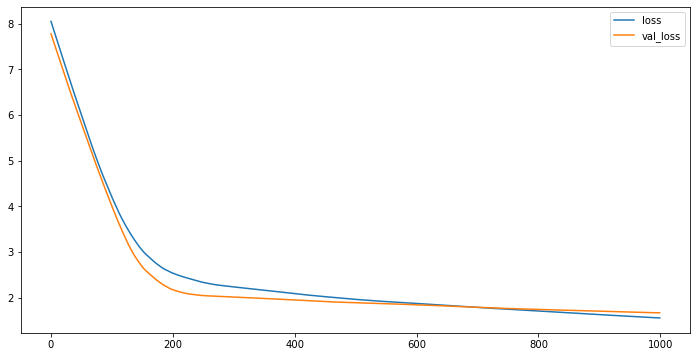

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [64]:
y_pred = model.predict(x_val_scale)
print(min(hist.history['val_loss']))
result['DL-Default'] = min(hist.history['val_loss'])

1.6667643785476685


In [65]:
# 모델 시각화
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


##1. 분석 방법 
- 아주 기본적인 모델 구조와 Sequential Api를 아주 Default한 딥러닝 모델를 만들었다.


##2. 분석 결과
- MAE는 2.4로써 좋지 않은 성능을 보였다.

* 모델2

In [66]:
########
# 모델링 : Sequential API style
########

# 1번 청소 : 이미 만들어진 모델이 있다면 그 모델을 없애줘
keras.backend.clear_session()

# 2번 모델 선언
model_hidden = keras.models.Sequential()

# 3번 모델 블록 조립
model_hidden.add( keras.layers.Input(shape=(input,)) )
model_hidden.add( keras.layers.Dense(512, activation='relu') )
model_hidden.add( keras.layers.Dense(128, activation='relu') )
model_hidden.add( keras.layers.Dense(64, activation='relu') )
model_hidden.add( keras.layers.Dense(32, activation='relu') )
model_hidden.add( keras.layers.Dense(32, activation='relu') )
model_hidden.add( keras.layers.Dense(1) )

## 오리지널 Sequential API
# model.add( keras.layers.Dense(1, input_shape=(1,)) )

# 4번 컴파일 
model_hidden.compile(loss='mae', optimizer='adam')

# model summary
model_hidden.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               10240     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 87,329
Trainable params: 87,329
Non-traina

In [67]:
es = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, patience=10, restore_best_weights=True)

hist = model_hidden.fit(x_train_scale, y_train, epochs=1000, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 1s 58ms/step - loss: 7.3317 - val_loss: 6.5688
Epoch 2/1000
6/6 [==============================] - 0s 14ms/step - loss: 6.1286 - val_loss: 4.5922
Epoch 3/1000
6/6 [==============================] - 0s 14ms/step - loss: 3.3085 - val_loss: 2.2735
Epoch 4/1000
6/6 [==============================] - 0s 16ms/step - loss: 2.8399 - val_loss: 2.1345
Epoch 5/1000
6/6 [==============================] - 0s 16ms/step - loss: 2.3509 - val_loss: 2.0785
Epoch 6/1000
6/6 [==============================] - 0s 14ms/step - loss: 2.2746 - val_loss: 1.8779
Epoch 7/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.9609 - val_loss: 1.9663
Epoch 8/1000
6/6 [==============================] - 0s 15ms/step - loss: 1.9066 - val_loss: 1.8130
Epoch 9/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.8235 - val_loss: 1.7952
Epoch 10/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.6960 - val_loss: 1.8218
Epoch 11/

In [68]:
y_pred = model_hidden.predict(x_val_scale)
print(y_pred[:2])
print(min(hist.history['val_loss']))
result['DL-Hidden'] = min(hist.history['val_loss'])

[[7.49893  ]
 [5.2514915]]
1.1291338205337524


* 모델3

### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


## 5.성능 비교

* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

In [69]:
result

{'LR': 1.1538557627482824,
 'DST': 1.923139417989418,
 'KNN': 1.2073859720281113,
 'SVM': 1.2073859720281113,
 'XGB': 1.449385,
 'DL-Default': 1.6667643785476685,
 'DL-Hidden': 1.1291338205337524}

<BarContainer object of 7 artists>

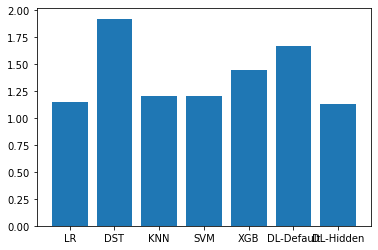

In [70]:
plt.bar(list(result.keys()), list(result.values()))

## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [71]:
test.isna().sum()

CompPrice      4
Income         7
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [72]:
# NAN 채우기
test['CompPrice'].fillna(0, inplace = True)
test['Income'].fillna(test['Income'].mean(), inplace = True)

In [73]:
# 2. 가변수화 두 번째 방법
dum_cols = ['ShelveLoc', 'US', 'Urban', 'Education']

test = pd.get_dummies(test, columns=dum_cols, drop_first=True)

In [74]:
# 경쟁사와 가격 차 변수 만들기
test['PriceGap'] = abs(test['CompPrice'] - test['Price'])

In [76]:
# 스케일링 적용 한 변수 생성
test_scale = scaler.fit_transform(test)

#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.
* 결과를 csv 파일로 저장해서 업로드 합니다.

In [77]:
pred_test = model_hidden.predict(test_scale)
pred_test

array([[ 8.045303 ],
       [ 6.9270496],
       [ 6.653394 ],
       [ 8.28925  ],
       [ 9.036669 ],
       [ 9.278668 ],
       [ 5.6003857],
       [10.171236 ],
       [ 6.688225 ],
       [ 6.193486 ],
       [ 5.0932236],
       [ 4.957684 ],
       [ 8.385939 ],
       [ 5.272774 ],
       [10.131589 ],
       [ 6.708564 ],
       [ 6.9384813],
       [ 6.8004656],
       [ 2.7813814],
       [ 9.445788 ],
       [ 8.63189  ],
       [ 7.713709 ],
       [ 9.919562 ],
       [ 5.1852508],
       [ 6.142585 ],
       [10.954802 ],
       [ 5.2769184],
       [11.935827 ],
       [ 8.733455 ],
       [ 8.616533 ],
       [ 7.831916 ],
       [ 5.469267 ],
       [ 8.7989435],
       [ 6.535554 ],
       [ 6.4228992],
       [ 9.402098 ],
       [ 4.238759 ],
       [10.315966 ],
       [ 6.586216 ],
       [ 7.4022994],
       [10.79851  ],
       [ 5.5975637],
       [ 3.9705462],
       [ 9.877188 ],
       [ 9.237581 ],
       [ 5.8662615],
       [ 6.659769 ],
       [ 8.04

In [78]:
pred_df = pd.DataFrame(pred_test)
pred_df

,0
0,8.045303
1,6.927050
2,6.653394
3,8.289250
4,9.036669
...,...
95,6.736064
96,9.684555
97,7.955218
98,3.093695


In [80]:
pred_df.to_csv('result.csv')